# Групповой проект №1. Первичный анализ данных "Международные авиаперевозки в США"

<img src="https://image.shutterstock.com/z/stock-vector-set-of-vector-tags-with-usa-airport-codes-vector-illustration-for-travelers-famous-american-451061281.jpg" height="400" />

Данные взяты из [отчета по статистике международных авиапассажирских и грузовых перевозок США](https://www.transportation.gov/policy/aviation-policy/us-international-air-passenger-and-freight-statistics-report#TheReports).

Этот же датасет, но в гугл драйв: https://drive.google.com/drive/folders/1P3i89WzfkVmC2L53G9qQxjzWJ3NSanat?usp=sharing

В ноутбуке скачивание данных происходит по ссылке с гугл-драйв, просьба не изменять.


Доступен следующий набор данных:

- **International_Report_Passengers.csv**: данные об общем количестве пассажиров за каждый месяц и год между парой аэропортов, обслуживаемых конкретной авиакомпанией.
Данные о пассажирах и грузоперевозках в США являются конфиденциальными в первые 6 месяцев, после чего они могут быть опубликованы. Количество пассажиров записывается в трех столбцах: «По расписанию», «Чартер» и «Всего»: "Scheduled", "Charter", "Total".

Описание атрибутов доступно по ссылке: https://data.transportation.gov/Aviation/International_Report_Passengers/xgub-n9bw


## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на занятии.  
Ссылка на шаблон к презентации: [ссылка](https://docs.google.com/presentation/d/1eydwcHaGKznePEbFuRT810cEGLgB3YYqpy-cDeRx_ik/edit?usp=sharing).  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

**Вопросы, на которые нужно ответить в презентации перечислены в ноутбуке.**

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите Екатерине (@poka_katt). 

## Требования к оформлению графиков (в ноутбуке и в презентации)

1. Каждый график необходимо подписывать
2. Оси Х и У всегда подписаны
3. Выбрана подходящая шкала и шаг 
4. Не забывайте про логарифмическую шкалу и всегда используйте при необходимости!


# Итак, приступим

In [ ]:
!pip install -U pip
!pip install -U matplotlib

Импортируем необходимые библиотеки

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

## Загрузим International_Report_Passengers.csv

In [ ]:
url='https://drive.google.com/file/d/1nvi3GFkmZDXSbLrTe_ZmyNAjZGQ74A4D/view?usp=sharing'

url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url2, delimiter=',')
df1.dataframeName = 'International_Report_Passengers.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 693122 rows and 16 columns


## Посмотрим на наш датасет

In [ ]:
df1

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,07/01/2004,2004,7,14747,SEA,93,16229,YVR,906,19687,QX,1,Passengers,19265,0,19265
1,11/01/2008,2008,11,11697,FLL,33,12010,GUA,127,20416,NK,1,Passengers,3099,0,3099
2,10/01/2002,2002,10,10257,ALB,22,16271,YYZ,936,20206,QK,0,Passengers,33,0,33
3,03/01/2007,2007,3,12889,LAS,85,13165,MAN,493,19541,BD,0,Passengers,3815,0,3815
4,03/01/2009,2009,3,12892,LAX,91,13252,MEX,148,19534,AM,0,Passengers,17993,0,17993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693117,03/01/2021,2021,3,99999,ZZZ,1,11519,EIS,282,21743,2LQ,1,Passengers,0,16,16
693118,03/01/2021,2021,3,99999,ZZZ,1,11731,FPO,204,21743,2LQ,1,Passengers,0,9,9
693119,03/01/2021,2021,3,99999,ZZZ,1,13605,NAS,204,21743,2LQ,1,Passengers,0,19,19
693120,03/01/2021,2021,3,99999,ZZZ,1,14682,SAQ,204,21743,2LQ,1,Passengers,0,77,77


## Отсортируем данные по дате

In [ ]:
df1.sort_values(by=['Year','Month'], inplace=True)
#Аргумент «inplace = True» означает, что фрейм данных должен сделать изменения постоянными,
#То есть сохранит изменения в загруженной таблице (у нас это df1)

In [ ]:
df1

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
294485,01/01/1990,1990,1,11042,CLE,44,11032,CUN,148,19892,ACQ,0,Passengers,0,796,796
294617,01/01/1990,1990,1,12892,LAX,91,14228,PPT,823,19508,UT,0,Passengers,1790,0,1790
294655,01/01/1990,1990,1,13495,MSY,72,11032,CUN,148,19556,LR,0,Passengers,1515,0,1515
294671,01/01/1990,1990,1,12173,HNL,2,16232,YWG,926,19523,CP,0,Passengers,2370,0,2370
294762,01/01/1990,1990,1,13303,MIA,33,10846,BZE,106,20144,TX,0,Passengers,6489,0,6489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693117,03/01/2021,2021,3,99999,ZZZ,1,11519,EIS,282,21743,2LQ,1,Passengers,0,16,16
693118,03/01/2021,2021,3,99999,ZZZ,1,11731,FPO,204,21743,2LQ,1,Passengers,0,9,9
693119,03/01/2021,2021,3,99999,ZZZ,1,13605,NAS,204,21743,2LQ,1,Passengers,0,19,19
693120,03/01/2021,2021,3,99999,ZZZ,1,14682,SAQ,204,21743,2LQ,1,Passengers,0,77,77


# Посмотрим на кол-во записей в таблице для 2010-2020 годов

In [ ]:
# 1ый способ:
n_flights = df1.loc[df1['Year']==2010]
print(len(n_flights))

23551


In [ ]:
# 2ой способ
n_flights = df1.query('Year==2010')
print(len(n_flights))

23551


 Согласитесь второй способ (с использованием "query") удобнее и красивее?

In [ ]:
# можно писать несколько условий
df1.query("Year==2020 & Month==3 & carrier=='RV'").head(3)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
671596,03/01/2020,2020,3,11697,FLL,33,16149,YOW,936,21610,RV,0,Passengers,4280,0,4280
671601,03/01/2020,2020,3,11697,FLL,33,16217,YUL,941,21610,RV,0,Passengers,40105,0,40105
671611,03/01/2020,2020,3,11697,FLL,33,16271,YYZ,936,21610,RV,0,Passengers,29844,0,29844


In [ ]:
years_to_check = np.arange(2010, 2022)

for year in years_to_check:
    n_flights = df1.query('Year=='+str(year))
    print(f"Для {year} года в таблице {len(n_flights)} записей.") #Как видите, в методе print() для вывода использован f-string.
                                                                    #Почитать подробнее можно здесь: https://realpython.com/python-f-strings/

Для 2010 года в таблице 23551 записей.
Для 2011 года в таблице 24516 записей.
Для 2012 года в таблице 24070 записей.
Для 2013 года в таблице 24464 записей.
Для 2014 года в таблице 25843 записей.
Для 2015 года в таблице 27234 записей.
Для 2016 года в таблице 28645 записей.
Для 2017 года в таблице 29998 записей.
Для 2018 года в таблице 30667 записей.
Для 2019 года в таблице 30436 записей.
Для 2020 года в таблице 15868 записей.
Для 2021 года в таблице 4183 записей.


В методе print() для вывода использован f-string. Почитать подробнее можно здесь: https://realpython.com/python-f-strings/

In [ ]:
# Проверим пропуски
df1.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

# Задание 1. Пассажирский трафик
Вопрос 1: Постройте график изменения кол-ва перевезенных людей (столбец Total) за январь-декабрь 2019 года и за январь-декабрь 2020. Можно построить в два графика или отразить 2 кривые на одном (второй вариант предпочтительнее, но тогда не забудьте изменить цвет у кривых). Какой вывод можно сделать исходя из графиков?

Ответ:


Вопрос 2: как изменился (в процентах) трафик между США и другими странами в период с января по декабрь 2020 года по сравнению с январем-декабрем 2019 года? (трафик=кол-во перевезенных за месяц людей). Изобразите в виде графика: по оси Х - месяц+год, по оси У - изменение трафика в процентах.

Ответ:

# Задание 2. Загруженность авиакомпаний

Вопрос 1: Нарисуйте топ 5 популярных авиакомпаний (airlineid, carrier) за все года (1990-2021). По оси Х на графике укажите название авикомпании (БЕЗ кода), по оси У - кол-во перевезенных людей за все года.

Ответ:

In [ ]:
df1_21 = df1.groupby('carrier').sum().sort_values(by=['Total'],ascending=False).head(5)
df1_21 

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
carrier,,,,,,,,,,,
AA,119953691,384841,768348467,2534806,785429856,21311482,1183883485,59777,593456143,1589331,595045474
UA,87354401,277920,557541713,2238449,574432141,20537428,868460121,43473,421232949,568167,421801116
DL,97938632,310059,578207148,1955173,637021922,20584589,964861450,48755,387201102,418096,387619198
BA,20874124,67213,132301091,478099,136590569,5324114,203489560,0,173855470,55204,173910674
CO,51121286,166157,309214599,1089547,333903459,9391509,503102232,25533,171309683,2553201,173862884


In [ ]:
tips21 = {'AA':'American Airlines', 
        'UA':'United Airlines', 
        'DL':'Delta Air Lines', 
        'BA':"British Airways", 
        'CO':'Cobalt Air'}

In [ ]:
df1_21.rename(index=tips21,inplace=True)

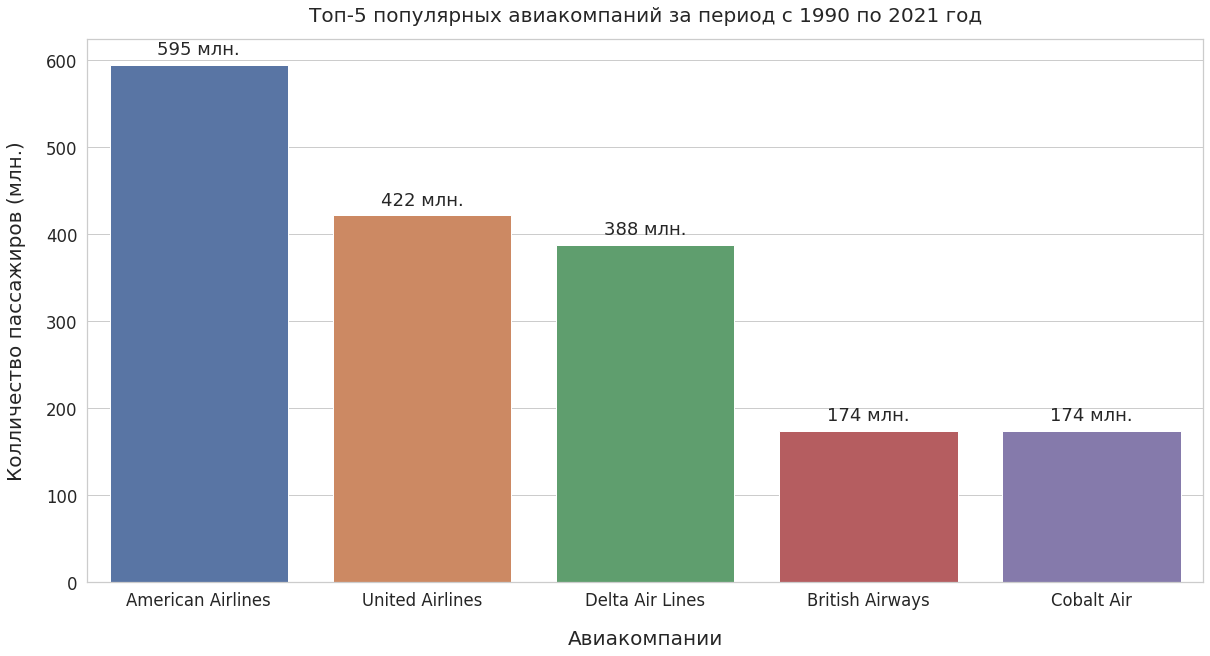

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid", font_scale=1.5)
ax = sns.barplot(x=df1_21.index, y=df1_21['Total']/1e6, palette="deep",data=df1_21)

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f')+' млн.',(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points')

plt.title('Топ-5 популярных авиакомпаний за период с 1990 по 2021 год', size = 20, y = 1.02)
plt.xlabel('Авиакомпании', size = 20, labelpad = 20.0)
plt.ylabel('Колличество пассажиров (млн.)', size = 20, labelpad = 20.0)
plt.show()

Вопрос 2: Какая авиакомпания самая "быстрорастущая", если оценивать рост по кол-ву перевезенных людей? Какая компания теряет клиентов?

Ответ:

In [ ]:
df1_22 = df1.groupby(by = ['Year','carrier']).sum()
df1_22

Month  usg_apt_id  usg_wac  ...  Scheduled  Charter    Total
Year carrier                              ...                             
1990 4H          24       39909       99  ...       4761        0     4761
     AA        7531    14437070    42327  ...    8483815    12028  8495843
     AC        2596     5541514    18295  ...    2714855   462724  3177579
     ACQ        857     1825974     6997  ...          0   142523   142523
     AE         433      816184     2146  ...          0   131333   131333
...             ...         ...      ...  ...        ...      ...      ...
2021 Y4         321     2191356    11905  ...     533682        0   533682
     YV         139      899312     5383  ...     105876        0   105876
     YX          94      614091     1487  ...      80655        0    80655
     ZG           1       12173        2  ...        150        0      150
     ZW           7       64152      150  ...       5125        0     5125

[6171 rows x 10 columns]

In [ ]:
# df1_22 = df1[['carrier','Year','Total']].groupby(by = ['carrier','Year']).sum().sort_values(by=['carrier','Year'])
# # .unstack(level='carrier').to_frame()
# df1_22

In [ ]:
piv = pd.pivot_table(df1_22, values='Total', index=['carrier'],columns=['Year'], aggfunc=np.sum)
piv

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
carrier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,875.0,533.0,295.0,219.0,636.0,432.0,3899.0,1825.0,3339.0,775.0,1068.0,131.0,2169.0,1655.0,NaN
04Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.0,2711.0,1117.0,3295.0,4805.0,5973.0,7418.0,10423.0,12332.0,16654.0,18819.0,18364.0,20890.0,22585.0,20250.0,4843.0
05Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,121.0,185.0,191.0,248.0,163.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364.0,8.0,308.0,63.0,198.0,1829.0,523.0,1490.0,860.0,3012.0,NaN,11925.0,42311.0,NaN,NaN
09Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,2474.0,3230.0,3522.0,4502.0,5076.0,7747.0,10126.0,138703.0,245096.0,313641.0,424886.0,587939.0,184145.0,427743.0,55600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZS,NaN,NaN,2121.0,1017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZUQ,NaN,6548.0,94702.0,83189.0,60430.0,61695.0,43883.0,3804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7771.0,11741.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pct = piv.pct_change(axis='columns').fillna(0)
pct

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
carrier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02Q,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.390857,-0.446529,-0.257627,1.904110,-0.320755,8.025463,-0.531931,0.829589,-0.767895,0.378065,-0.877341,15.557252,-0.236976,0.000000
04Q,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.037862,-0.587975,1.949866,0.458270,0.243080,0.241922,0.405096,0.183153,0.350470,0.129999,-0.024178,0.137552,0.081139,-0.103387,-0.760840
05Q,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000,0.528926,0.032432,0.298429,-0.342742,-0.914110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
07Q,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.978022,37.500000,-0.795455,2.142857,8.237374,-0.714051,1.848948,-0.422819,2.502326,0.000000,2.959163,2.548092,0.000000,0.000000
09Q,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,12.372973,0.305578,0.090402,0.278251,0.127499,0.526202,0.307087,12.697709,0.767056,0.279666,0.354689,0.383757,-0.686796,1.322860,-0.870015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZS,0.0,0.000000,0.000000,-0.520509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZUQ,0.0,0.000000,13.462737,-0.121571,-0.273582,0.020933,-0.288711,-0.913315,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZV,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.510874,-0.991398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# самая быстрорастущая компания
pct['increase%'] = pct.sum(axis=1)
increase = pct.sort_values(by='increase%', ascending=False).head(1)
increase

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,increase%
carrier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4584.018349,3.336345,0.347101,0.324867,0.179124,-0.065373,-0.721881,-0.717162,13760.104111


In [ ]:
# быстрее всего теряет клиентов 
pct['increase%'] = pct.sum(axis=1)
fall = pct.sort_values(by='increase%', ascending=False).tail(1)
fall

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,increase%
carrier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.128687,0.044684,-0.327616,-0.088047,0.039081,-0.035783,-0.108554,-0.148229,-0.003082,-0.316343,-0.419787,-0.087535,-0.964433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29.730449


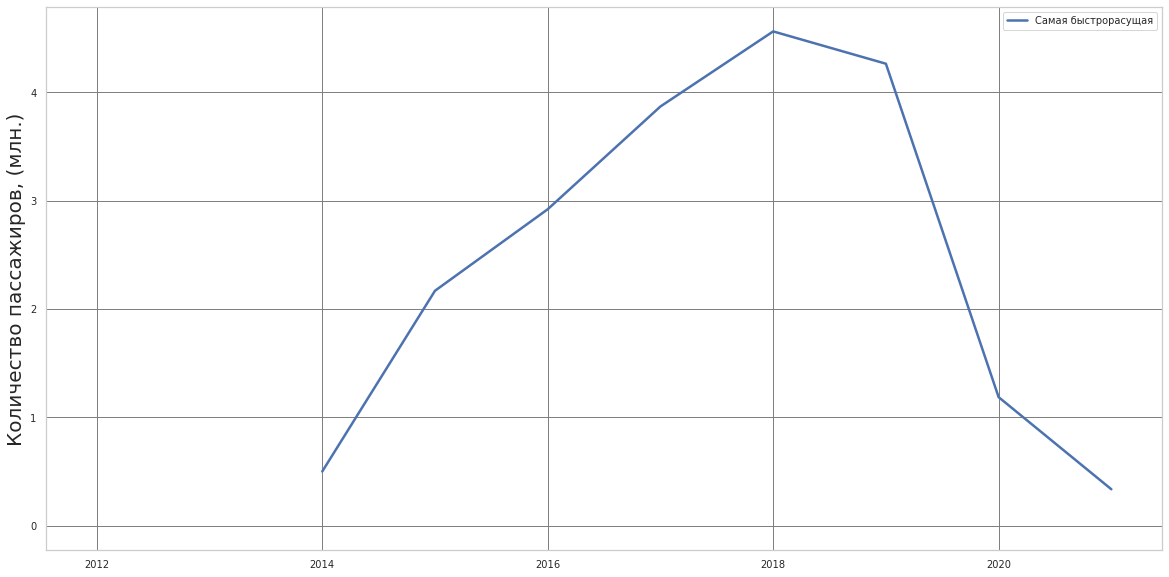

In [ ]:
ax = plt.figure(figsize=(20,10))

plt.plot(piv.loc[['WN']].T.index, piv.loc[['WN']].T.values/1e6, linewidth = 2.5, label='Самая быстрорасущая')
# plt.plot(piv.loc[['MP']].T.index, piv.loc[['MP']].T.values/1e6, color = 'red', linestyle = '--', linewidth = 2.5, label='Быстрее всего теряет клиентов' )

# plt.xlabel('Месяц', fontsize = 20)
plt.ylabel('Количество пассажиров, (млн.)', fontsize = 20)
plt.legend()
plt.grid(color='grey', linewidth=1)
ax.set_facecolor(color='w')
plt.show()

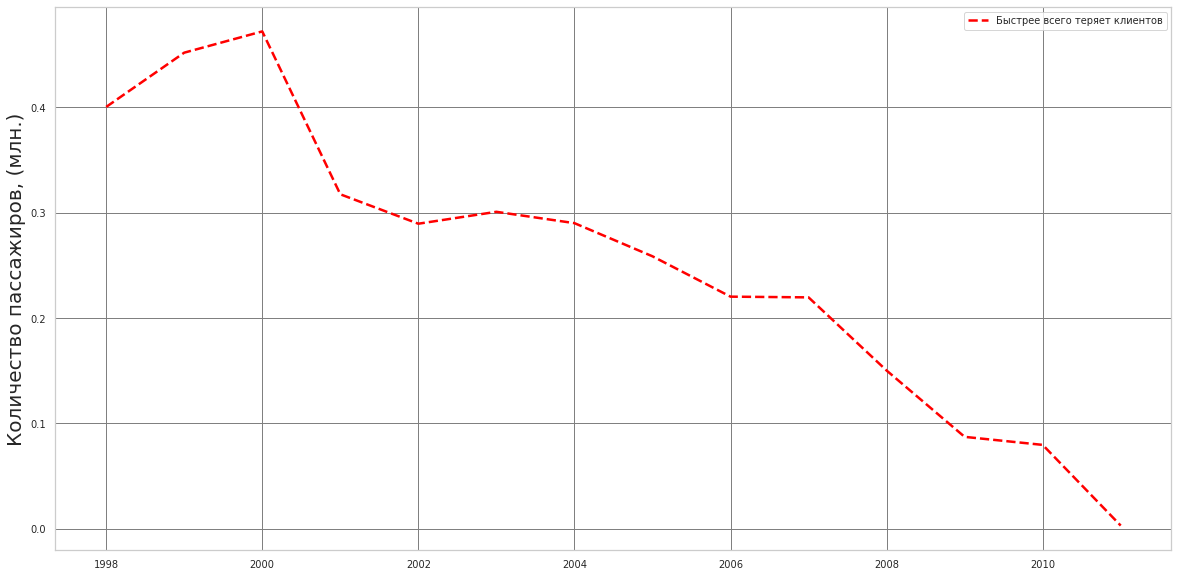

In [ ]:
ax = plt.figure(figsize=(20,10))

# plt.plot(piv.loc[['WN']].T.index, piv.loc[['WN']].T.values/1e6, linewidth = 2.5, label='Самая быстрорасущая')
plt.plot(piv.loc[['MP']].T.index, piv.loc[['MP']].T.values/1e6, color = 'red', linestyle = '--', linewidth = 2.5, label='Быстрее всего теряет клиентов' )

# plt.xlabel('Месяц', fontsize = 20)
plt.ylabel('Количество пассажиров, (млн.)', fontsize = 20)
plt.legend()
plt.grid(color='grey', linewidth=1)
ax.set_facecolor(color='w')
plt.show()

# Задание 3. Загруженность аэропортов

Вопрос 1: Нарисуйте топ 5 по загруженности аэропортов В США за все года (1990-2021). По оси Х на графике укажите код аэропорта + город, в котором он находится (город по коду придется найти в открытых источниках), по оси У - кол-во перевезенных людей за все года. Для кодировки аэропортов используется код IATA (International Air Transport Association airport code).

Ответ:


In [ ]:
df1.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
df1_31 = df1.groupby('usg_apt').sum().sort_values(by=['Total'],ascending=False).reindex().head(5)
df1_31

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
usg_apt,,,,,,,,,,,
JFK,130495051,421330,812130630,1431870,845582769,28380467,1296302259,31037,630414750,7289998,637704748
LAX,97567221,314687,627195800,4427150,655012115,23260973,969170541,14718,491938882,2659809,494598691
MIA,126246037,404660,837729819,2078109,812988450,18926355,1256176464,32708,475951720,16643691,492595411
ORD,71405856,226165,495796560,1459272,479944061,17599657,709498422,19965,284514844,6545765,291060609
EWR,67393426,217787,390062732,719328,447594499,16166733,668810468,22009,257161067,3037917,260198984


In [ ]:
tips31 = {'JFK':'JFK, New York City', 
        'LAX':'LAX, Los Angeles', 
        'MIA':'MIA, Miami', 
        'ORD':"ORD, Chicago", 
        'EWR':'EWR, New Jersey'}

In [ ]:
df1_31.rename(index=tips31,inplace=True)

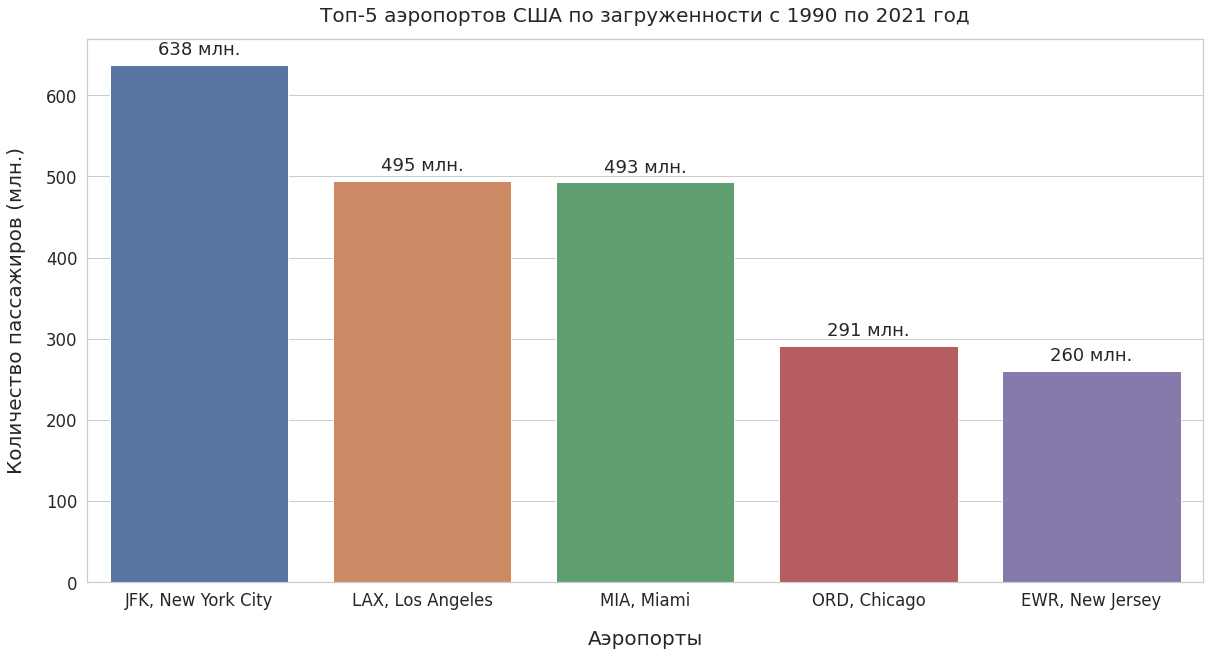

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid", font_scale=1.5)
ax = sns.barplot(x=df1_31.index, y=df1_31['Total']/1e6, palette="deep",data=df1_31)

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f')+' млн.',(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points')

plt.title('Топ-5 аэропортов США по загруженности с 1990 по 2021 год', size = 20, y = 1.02)
plt.xlabel('Аэропорты', size = 20, labelpad = 20.0)
plt.ylabel('Количество пассажиров (млн.)', size = 20, labelpad = 20.0)
plt.show()

Вопрос 2: Нарисуйте топ 5 популярных иностранных аэропортов (ВНЕ США) за все года (1990-2021). По оси Х на графике укажите код аэропорта + город, в котором он находится (город по коду придется найти в открытых источниках), по оси У - кол-во перевезенных людей за все года.

Ответ:

In [ ]:
df1_32 = df1.groupby('fg_apt').sum().sort_values(by=['Total'],ascending=False).reindex().head(5)
df1_32

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
fg_apt,,,,,,,,,,,
LHR,31491640,102064,199261858,751921,203556624,7736156,309500900,6303,329418294,84593,329502887
YYZ,87969670,281380,556049068,1856701,712930136,41011776,884417878,17303,251238312,7447490,258685802
NRT,33618985,108431,216180506,800992,230500624,12343456,330748660,9462,254566322,625094,255191416
FRA,27979675,90995,175486534,615200,164146080,5987982,276145734,5727,174590311,912640,175502951
CDG,23260502,76095,145787808,513624,126606480,4950638,229922888,6464,154561057,554689,155115746


In [ ]:
tips32 = {'LHR':'LHR, London', 
        'YYZ':'YYZ, Toronto', 
        'NRT':'NRT, Tokyo', 
        'FRA':"FRA,  Frankfurt", 
        'CDG':'CDG, Paris'}

In [ ]:
df1_32.rename(index=tips32,inplace=True)

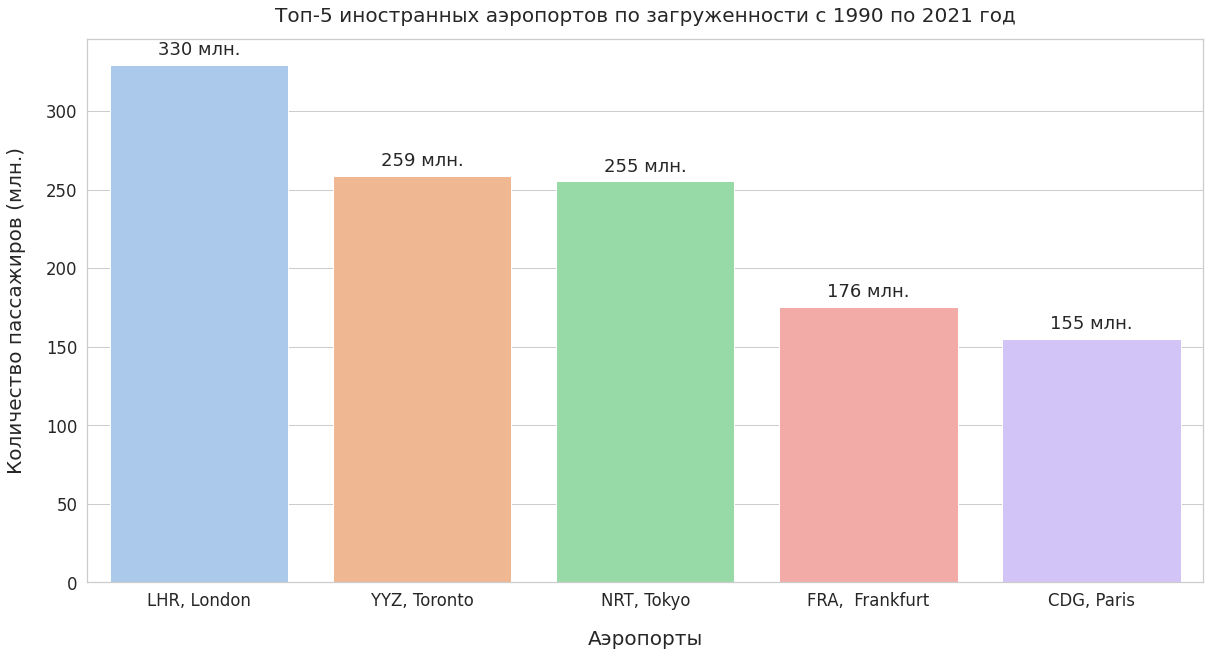

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid", font_scale=1.5)
ax = sns.barplot(x=df1_32.index, y=df1_32['Total']/1e6, palette="pastel")

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f')+' млн.',(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points')

plt.title('Топ-5 иностранных аэропортов по загруженности с 1990 по 2021 год', size = 20, y = 1.02)
plt.xlabel('Аэропорты', size = 20, labelpad = 20.0)
plt.ylabel('Количество пассажиров (млн.)', size = 20, labelpad = 20.0)
plt.show()

# Задание 4. Подробный анализ загруженности

Вопрос 1: Для каждого года выведите топ месяцев, в которых трафик был максимальным (постарайтесь визуализировать так, чтобы с первого взгляда график был понятен и читался "вне контекста")

Ответ:

In [ ]:
Years = df1.Year.unique()
Years

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
dict_colors = {1:'lavender',2:'lightblue',3:'dodgerblue',4:'orchid',5:'oliverdrab',6:'moccasin',7:'gold',8:'darkorange',9:'darkorange',10:'tan',11:'grey',12:'steelblue'}

In [ ]:
dict_month = {1:'Январь',2:'Февраль',3:'Март',4:'Апрель',5:'Май',6:'Июнь',7:'Июль',8:'Август',9:'Сентябрь',10:'Октябрь',11:'Ноябрь',12:'Декабрь'}

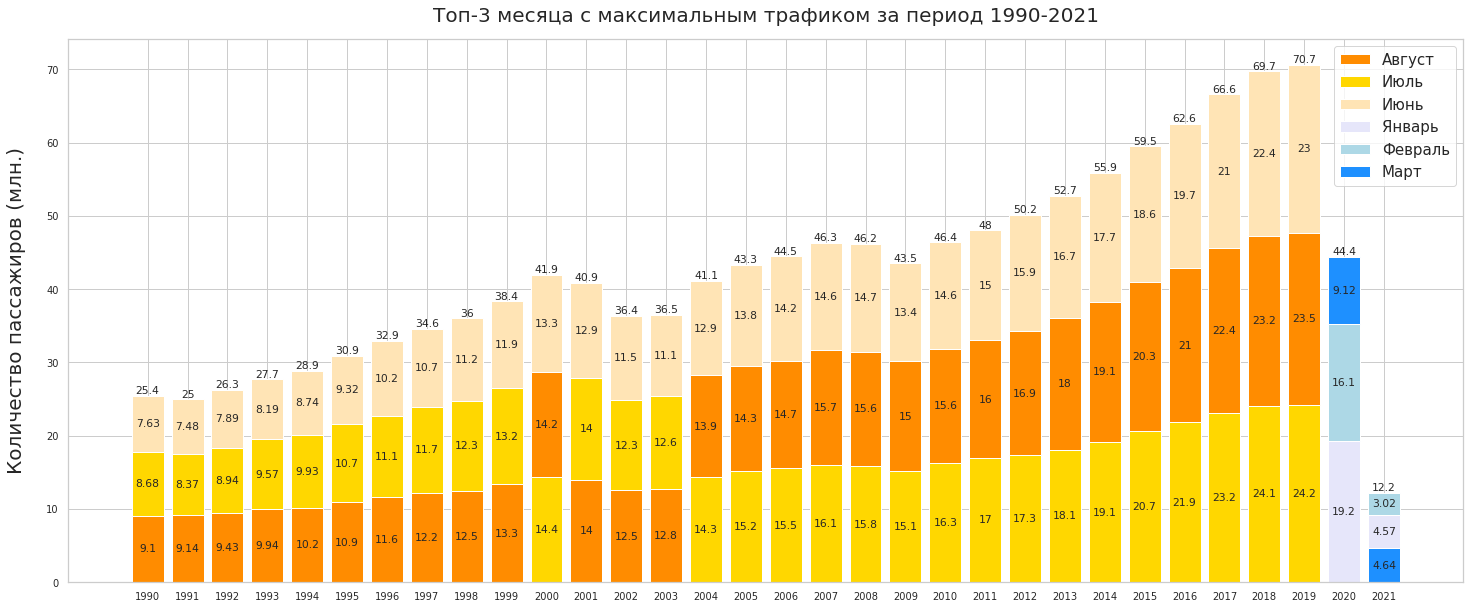

In [ ]:
from matplotlib.patches import Patch
width = 0.8      
used_mounth = {}
f, ax = plt.subplots(figsize=(25,10))
sns.set_theme(style="whitegrid", font_scale=0.9)
for i in Years:
    df_0 = df1[df1.Year==i].groupby('Month').sum().sort_values(by=['Total'],ascending=False).head(3).reset_index()
    # for j in range(3):
    p1 = ax.bar(i, df_0.Total[0]/1e6, width, color=dict_colors[df_0.Month[0]])
    p2 = ax.bar(i, df_0.Total[1]/1e6, width, color=dict_colors[df_0.Month[1]], bottom=df_0.Total[0]/1e6)
    p3 = ax.bar(i, df_0.Total[2]/1e6, width, color=dict_colors[df_0.Month[2]], bottom=df_0.Total[0]/1e6+df_0.Total[1]/1e6)
    used_mounth[dict_colors[df_0.Month[0]]] = dict_month[df_0.Month[0]]
    used_mounth[dict_colors[df_0.Month[1]]] = dict_month[df_0.Month[1]]
    used_mounth[dict_colors[df_0.Month[2]]] = dict_month[df_0.Month[2]]
    ax.bar_label(p1, label_type='center',fmt='%.3g')
    ax.bar_label(p2, label_type='center',fmt='%.3g')
    ax.bar_label(p3, label_type='center',fmt='%.3g')
    ax.bar_label(p3,fmt='%.3g')

# ax.set_ylabel('Total')
# ax.set_title('TOP-3 Months')

leg = []
for i in used_mounth.keys():
  leg.append(Patch(facecolor=i, label=used_mounth[i]))

plt.title('Топ-3 месяца с максимальным трафиком за период 1990-2021', size = 20, y = 1.02)
plt.ylabel('Количество пассажиров (млн.)', size = 20, labelpad = 20.0)    
ax.legend(handles=leg, fontsize = 15)
plt.xticks(range(1990,2022,1))

plt.show()

Вопрос 2: Есть ли какие-то повторяющиеся месяцы, входящие в топ из года в год (или несколько лет подряд)? Если да, то какие для этого могут быть причины? Выдвиньте несколько гипотез.

Ответ:



В период 1990-2019 максимальное количество авиаперевозок приходилось на летние месяцы. Вероятнее всего это связано с периодом отпусков и летнего отдыха. В 2020 году топ перелетов сместился на январь-март по причине введения локданов и значительного снижения авиаперелетов начиная с весны 2020. Статистика 2021 года включает в себя только первый квартал, тем не менее заметно значительное снижение количества перелетов по сравнению с аналогичным периодом 2020. Вероятная причина - пик заражений коронавирусом и ужесточение мер эпидемиологического контроля. Также, в качестве дополнительного фактора можно отметить усилившуюся цифровизацию бизнеса и снижение колличества деловых поездок.   

Вопрос 3: Какое кол-во людей (в процентах) потеряли ТОП 5 **авиакомпаний** за период февраль-декабрь 2020 года, в сравнении с периодом февраль-декабрь 2019 года? Отобразите на графике. 

Ответ:

In [ ]:
# df1[(df1.Year==2020) & (df1.Month==11)]

In [ ]:
[i for i in range(2,13)]

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Вопрос 4: Предположим, что по предварительным рассчетам (на июнь 2019 года) план по перелетам на февраль-декабрь 2020 года был такой же как на февраль-декабрь 2019 года. Если так, то какие фактические убытки понесли ТОП 5 **авиакомпаний**, если чистая прибыль за 1 человека в среднем = 15$.

Ответ:

# Задание 5 (Дополнительно)
Здесь Вы можете поэксперементировать - провести собственный анализ, выдвинуть гипотезы относительно данных